# **Import packages**

In [ ]:
import numpy as np # handling multi-dimensional arrays and matrices
import pandas as pd # handling dataframes
from matplotlib import pyplot as plt # visualization for 2D and 3D plots
%matplotlib inline
import seaborn as sns # based on matplotlib, for statistical graphics
from sklearn.manifold import MDS # function to visualizes the similarity or dissimilarity between data points in a lower-dimensional space
from sklearn.preprocessing import MinMaxScaler # function to scale features

# **Preprocessing**
"Before analysis, the dataset underwent several preprocessing steps:
- Missing values were checked.
- Balance of 'target' was checked in both textual, and visual way.
- Relationships between multiple variables were explored simultaneously using pair plots, scatter plot matrices, and multidimensional scaling (MDS).
- Correlataion was determined in both textual, and visual way using a heatmap.
- Outliers were detected and treated using the Interquartile Range (IQR) method.
- Numeric features were scaled using MinMaxScaler to ensure uniformity of scale for modeling."

In [ ]:
# Heart Disease dataset sourced from kaggle
Heartdata=pd.read_csv('heart.csv')
print(Heartdata.shape) #print number of rows,columns in dataset
print(Heartdata.columns)

(1025, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
#show sample of dataset
Heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
Heartdata.info()
'''
we can observe from the output if there are null values
and alse we can see types of each column, memory usage of the dataset, and its shape
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


'\nwe can observe from the output if there are null values\nand alse we can see types of each column, memory usage of the dataset, and its shape\n'

In [ ]:
# summation of null values at each column in the dataset
Heartdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# describe function Summarize Statistics for Numerical data to recognize the nature of our dataset, and to see if there are outliers
Heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Visualize dataset and treat outliers

In [ ]:
# The count of unique values in the 'target' column
Heartdata['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

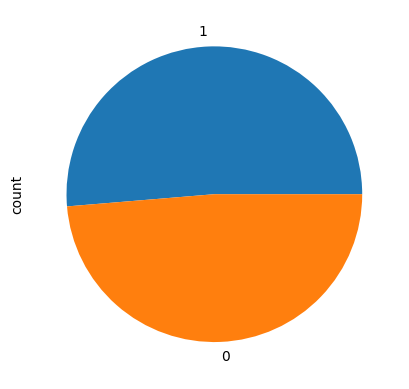

In [ ]:
# Check the balance of classes in the 'target' variable
Heartdata['target'].value_counts().plot(kind='pie');

<ipython-input-9-858bcadff4dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=Heartdata,palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

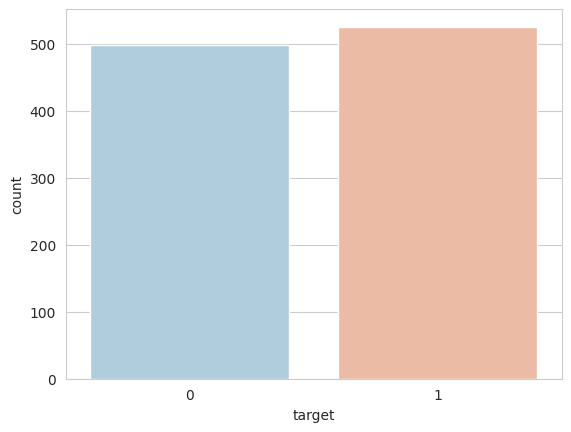

In [ ]:
# another way to check the balance
sns.set_style('whitegrid')
sns.countplot(x='target',data=Heartdata,palette='RdBu_r')

In [ ]:
columns=Heartdata.columns
'''calculate correlation_matrix which is a matrix or a data structure
that contains correlations between  between numerical columns and 'target' '''
correlation_matrix = Heartdata[columns].corr()

# sort correlations with 'target' in descending order
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)

# display correlations with 'target'
print(correlation_with_target)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


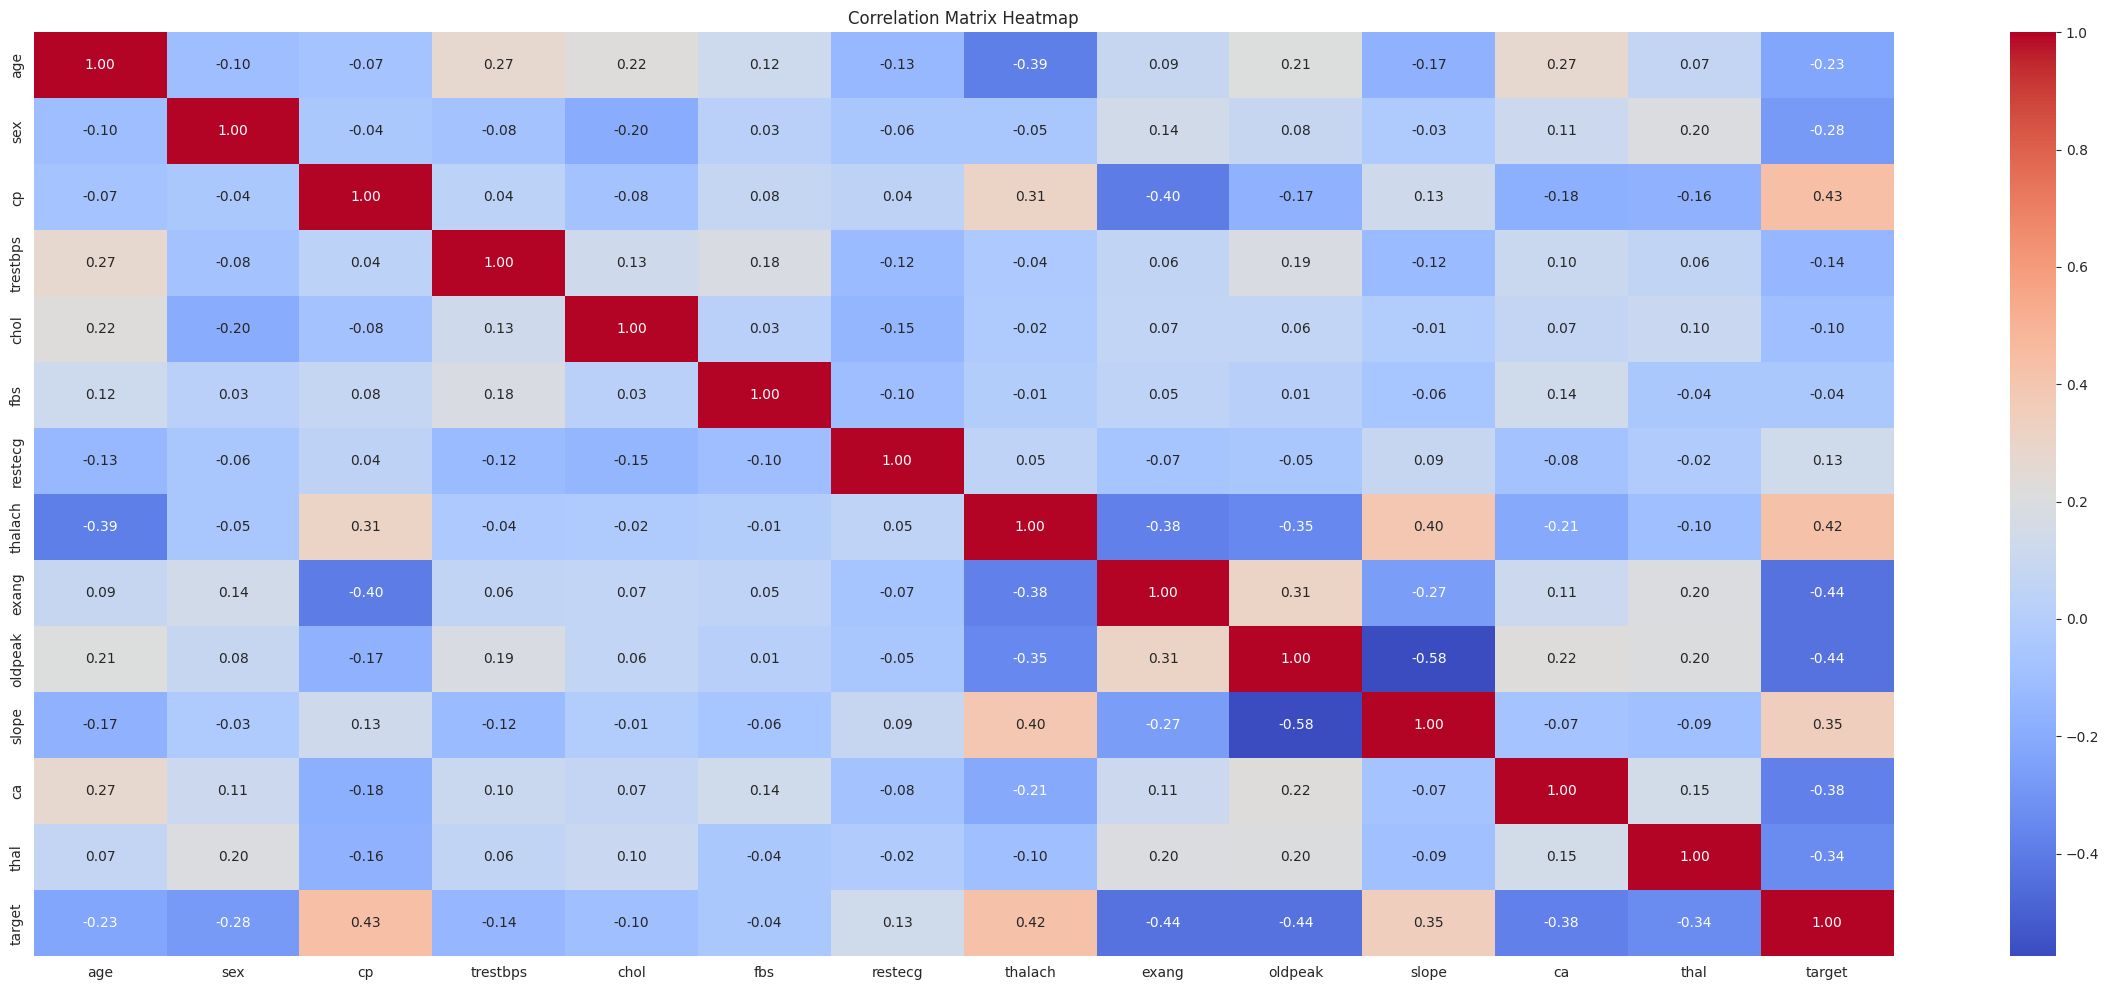

In [ ]:
'''calculating correlation_matrix which is a matrix or a data structure
that contains correlations between different variables in a dataset'''

correlation_matrix = Heartdata.corr()

'''heatmap visualization: each cell's color represents
the strength and direction of correlation between the variables.
Positive correlations --> represented by warmer colors,
negative correlations --> by cooler colors,
and the intensity of the color signifies the magnitude of the correlation.
The annotations within the cells will show the actual correlation values'''

# plotting the heatmap
plt.figure(figsize=(30, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# annot=True: This parameter specifies whether to annotate the heatmap with the numeric values or not.
# fmt=".2f": This parameter specifies the format of the annotations (.2f stands for two decimal places)

plt.title('Correlation Matrix Heatmap')
plt.show()


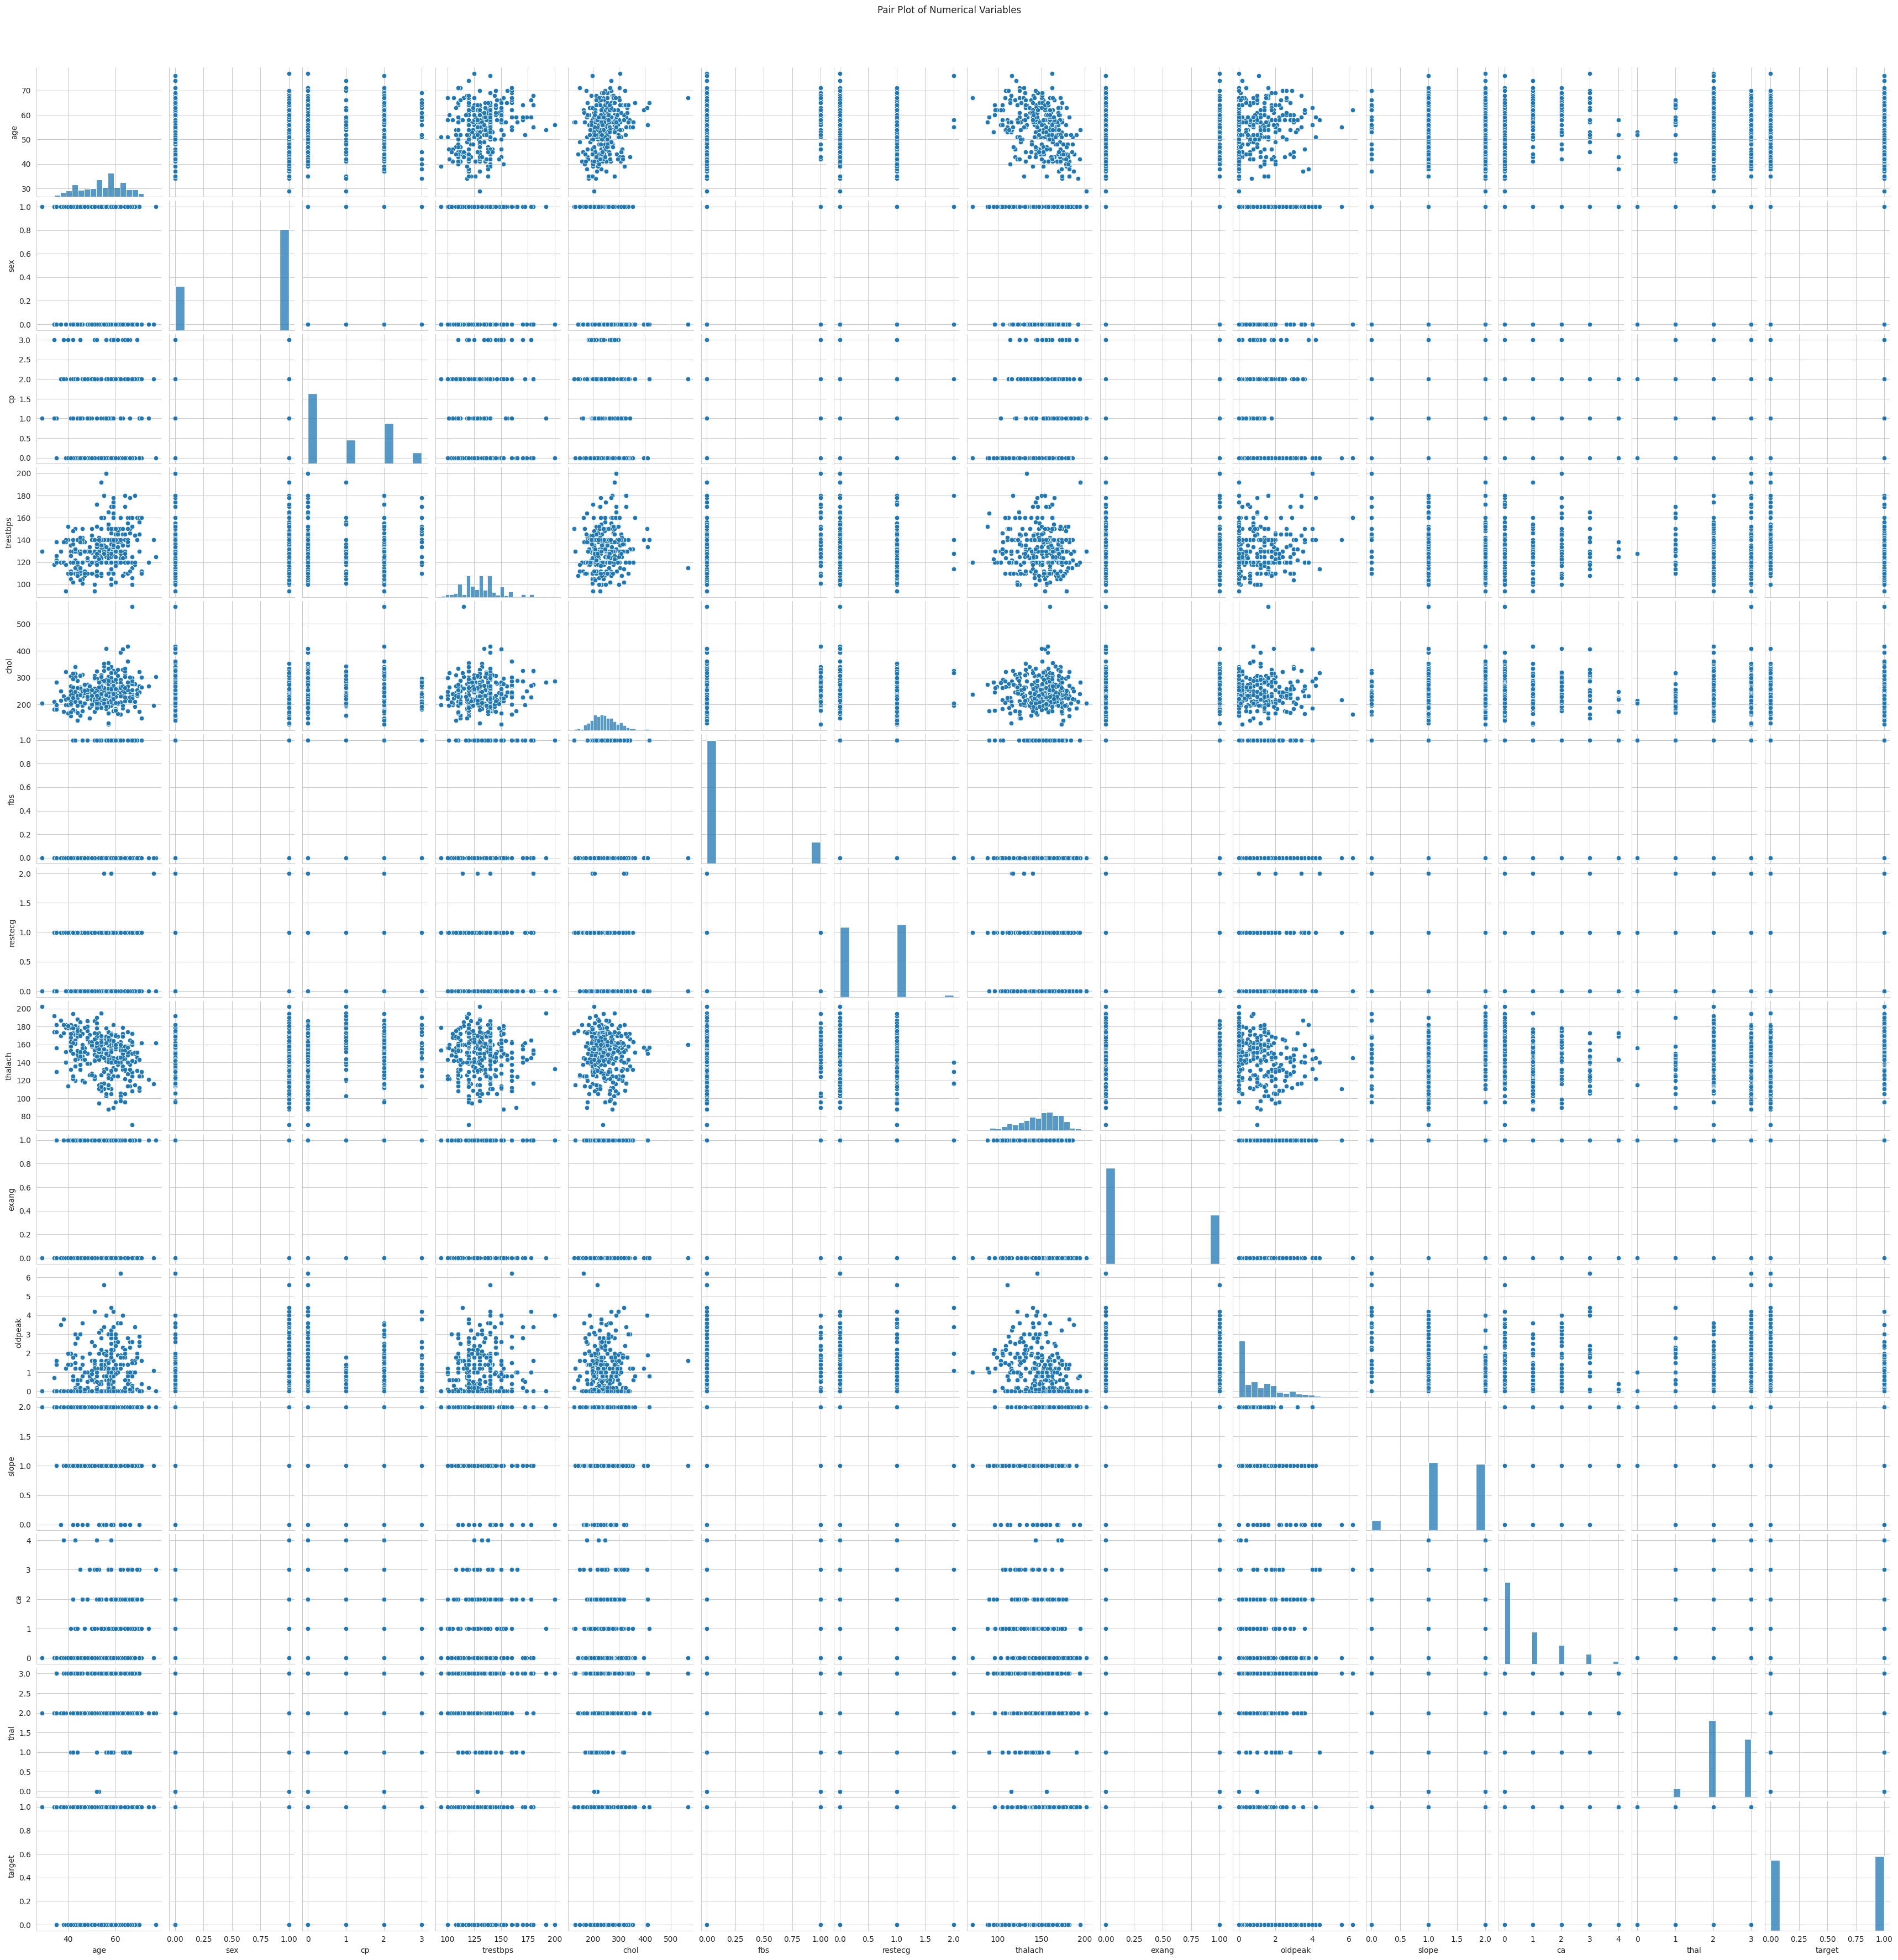

In [ ]:
# Pair plot for numerical variables
pair_plot  = sns.pairplot(Heartdata)
# suptitle function from Matplotlib to place the title of the pair plot in a corner
pair_plot.fig.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

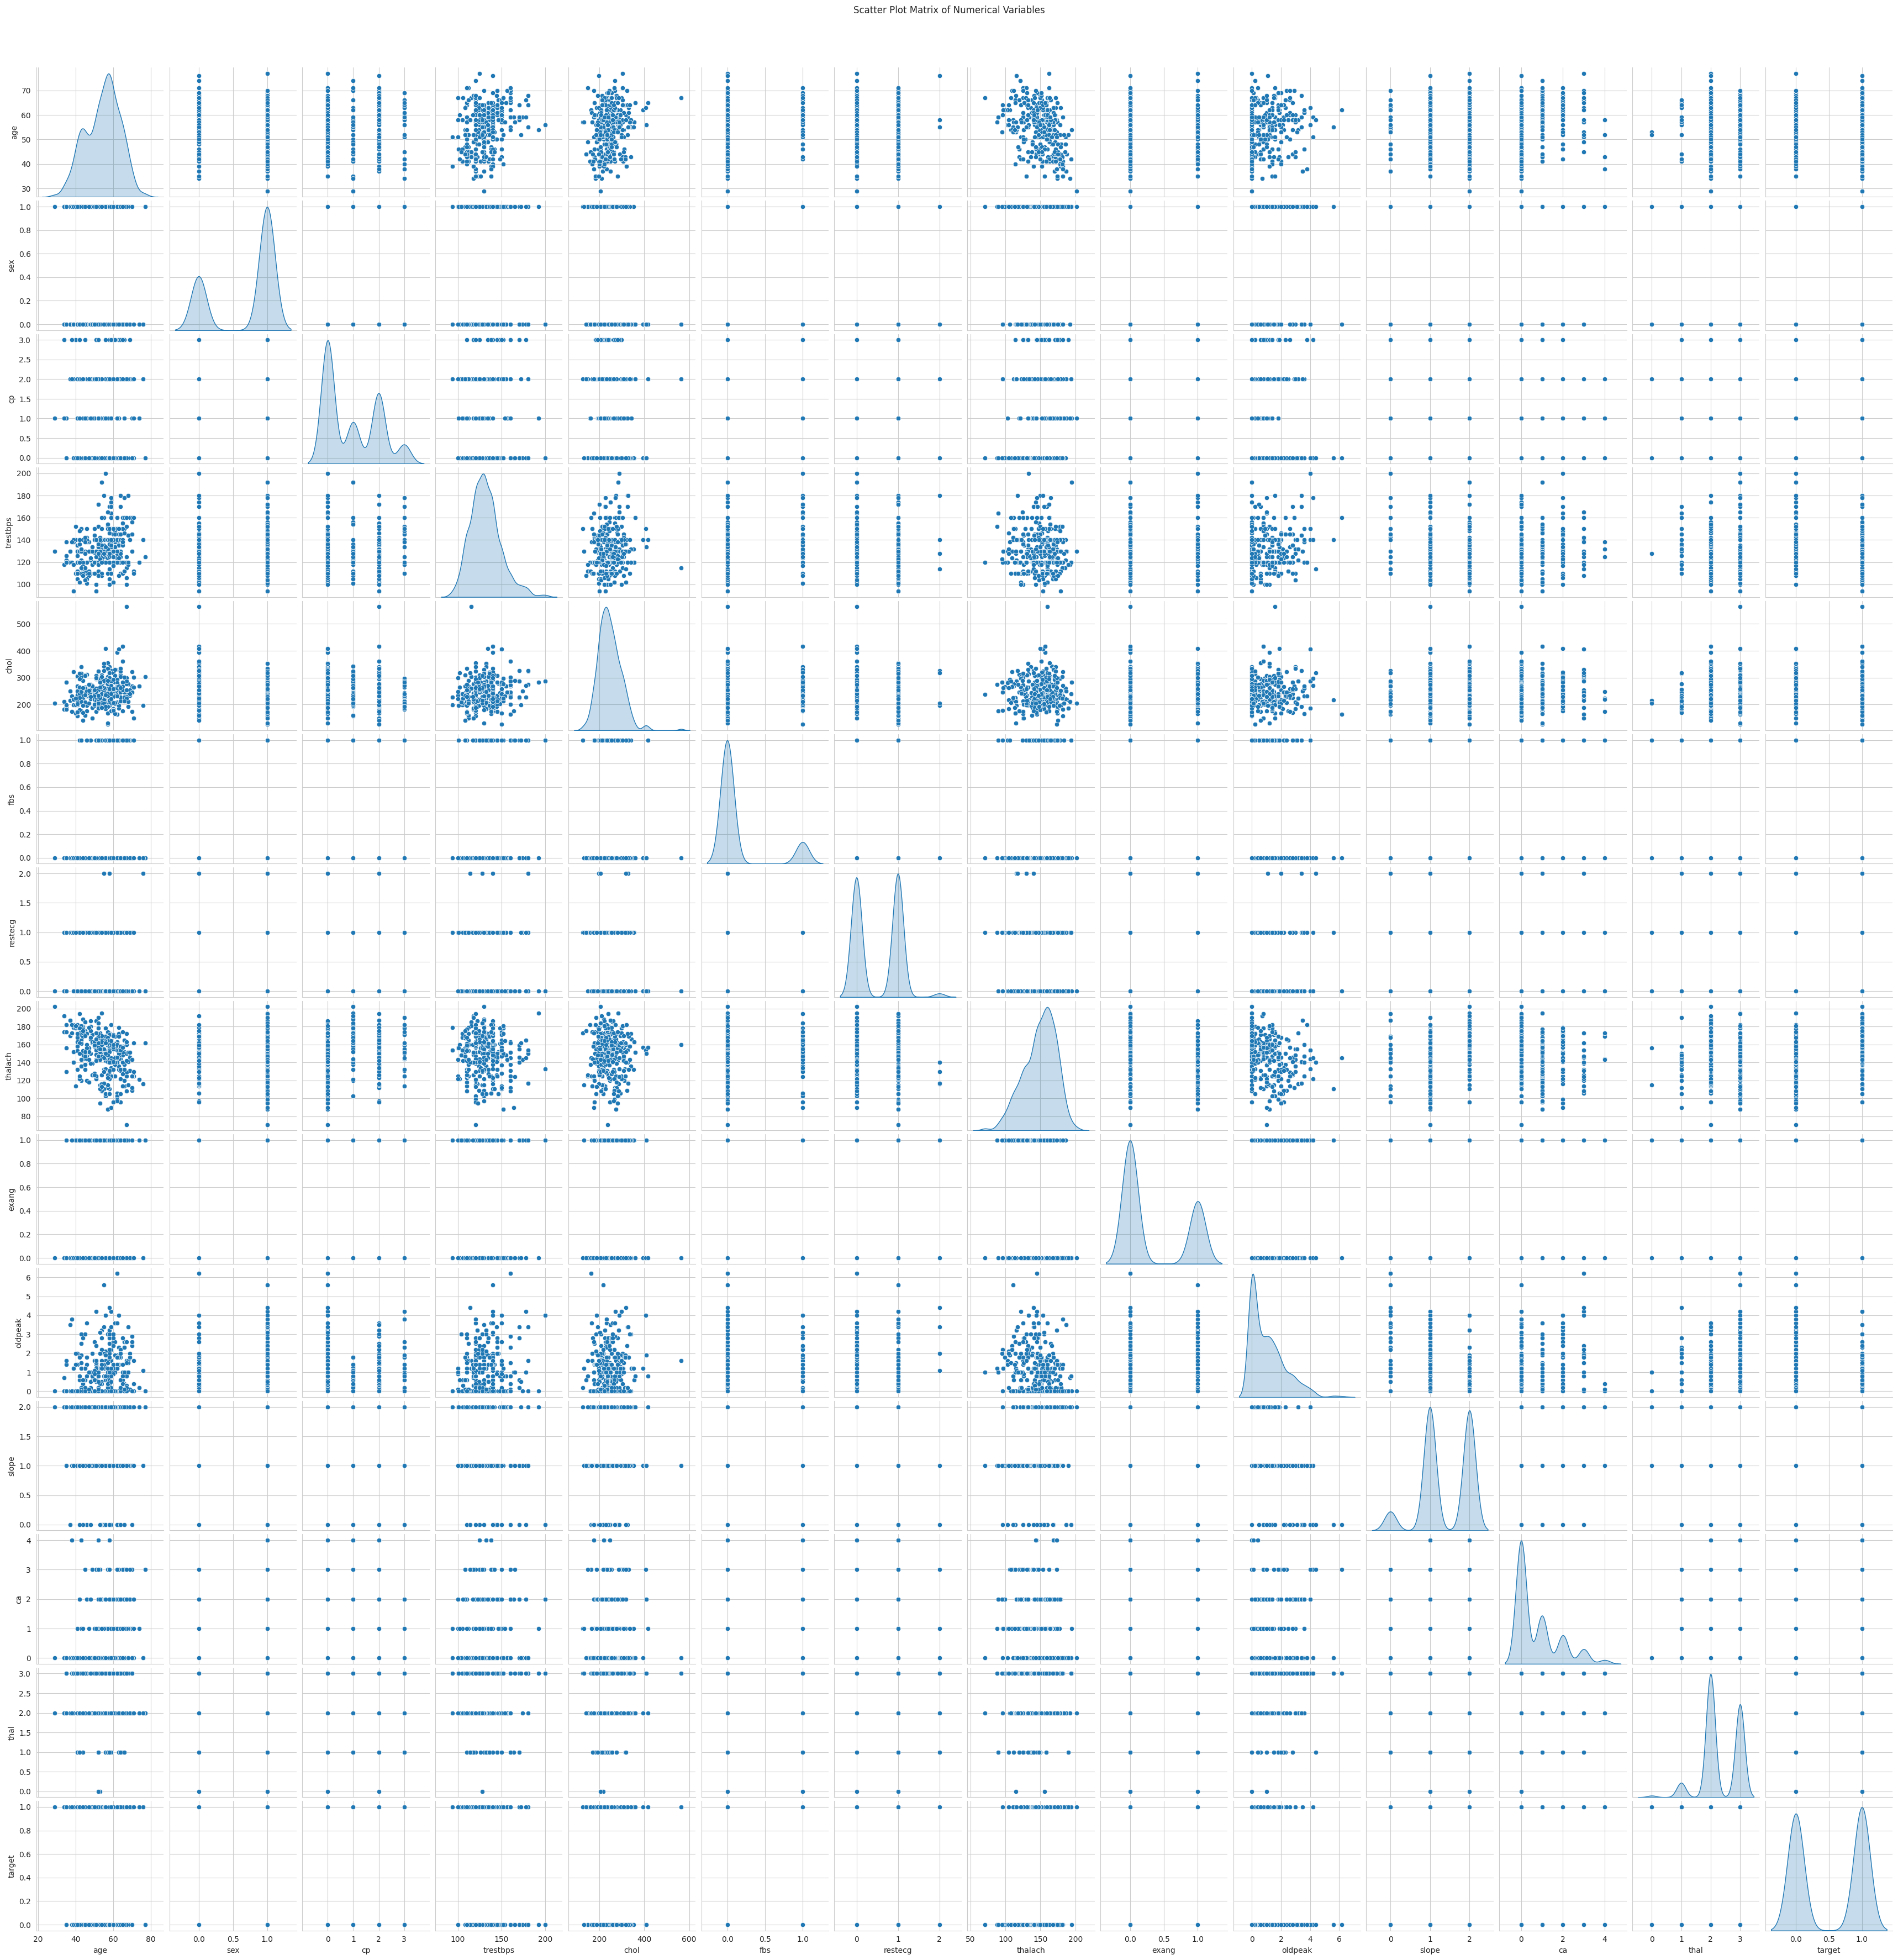

In [ ]:
'''display scatter plots for pairs of numerical variables with KDE plots along the diagonal,
providing additional insights into the distribution of each numerical variable.'''

pair_plot = sns.pairplot(Heartdata, diag_kind='kde')
pair_plot.fig.suptitle('Scatter Plot Matrix of Numerical Variables', y=1.02)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


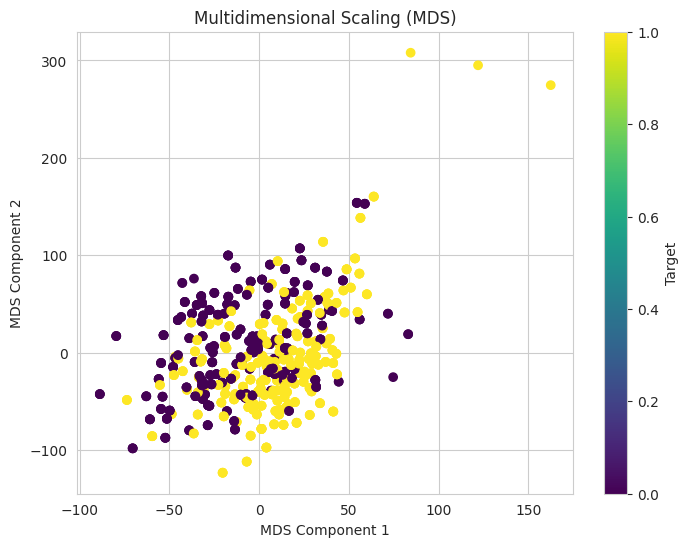

In [ ]:
'''Multidimensional scaling is a dimensionality reduction technique
that visualizes the similarity or dissimilarity between data points in a lower-dimensional space.
The colors of the points represent different categories of the 'target' variable, providing insights into how the data is distributed in the reduced space.'''

# Perform MDS to visualize high-dimensional data in 2D
mds = MDS(n_components=2)

# transform the data into a two-dimensional space
mds_data = mds.fit_transform(Heartdata)

# Plot MDS results
plt.figure(figsize=(8, 6))
plt.scatter(mds_data[:, 0], mds_data[:, 1], c=Heartdata['target'], cmap='viridis')
plt.title('Multidimensional Scaling (MDS)')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(label='Target')
plt.show()

<ipython-input-15-020250fd316c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target',y=columns[i], data=Heartdata, palette='winter')
<ipython-input-15-020250fd316c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target',y=columns[i], data=Heartdata, palette='winter')
<ipython-input-15-020250fd316c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target',y=columns[i], data=Heartdata, palette='winter')
<ipython-input-15-020250fd316c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

"We observed the outliers, but we didn't define them precisely"

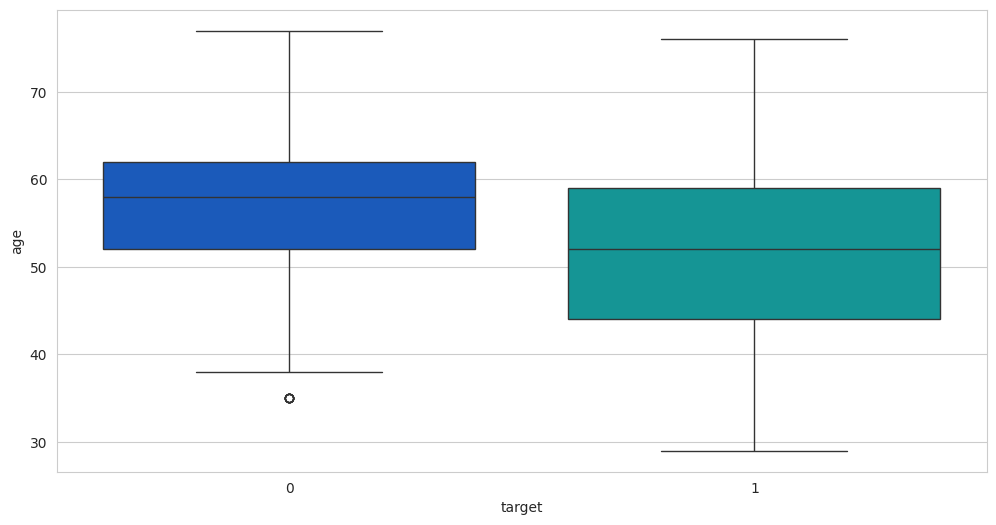

<Figure size 640x480 with 0 Axes>

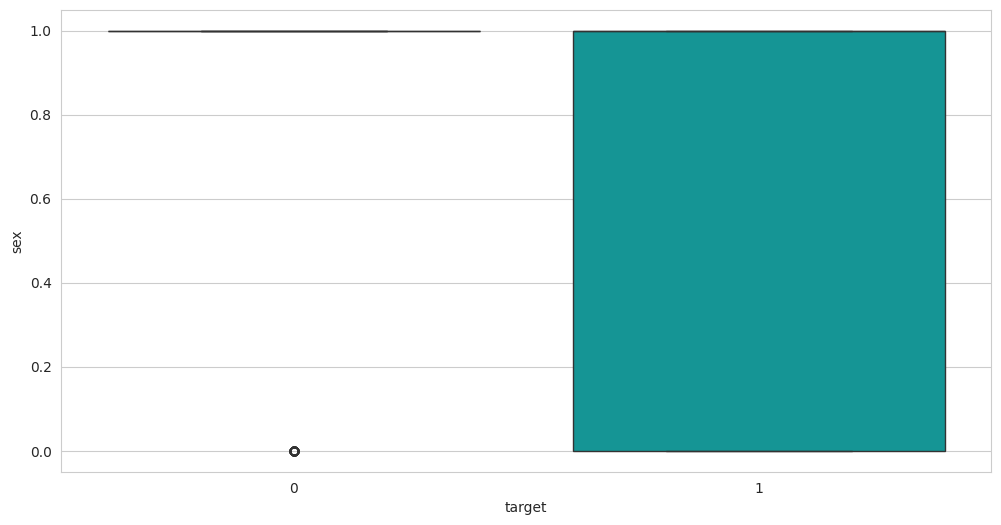

<Figure size 640x480 with 0 Axes>

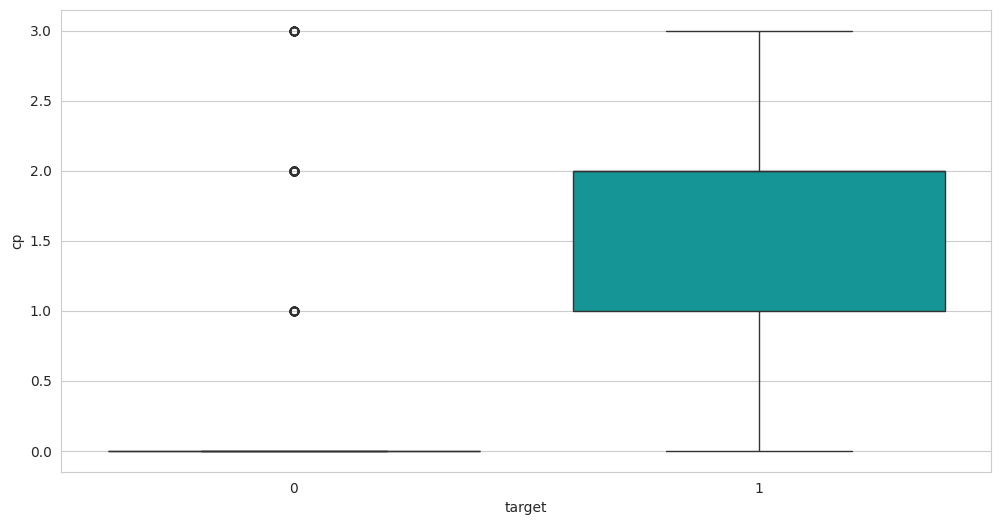

<Figure size 640x480 with 0 Axes>

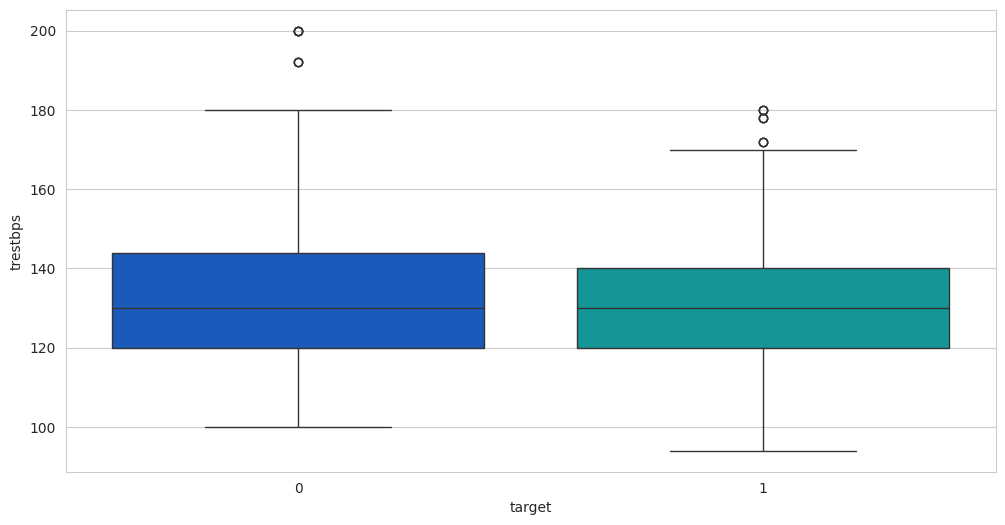

<Figure size 640x480 with 0 Axes>

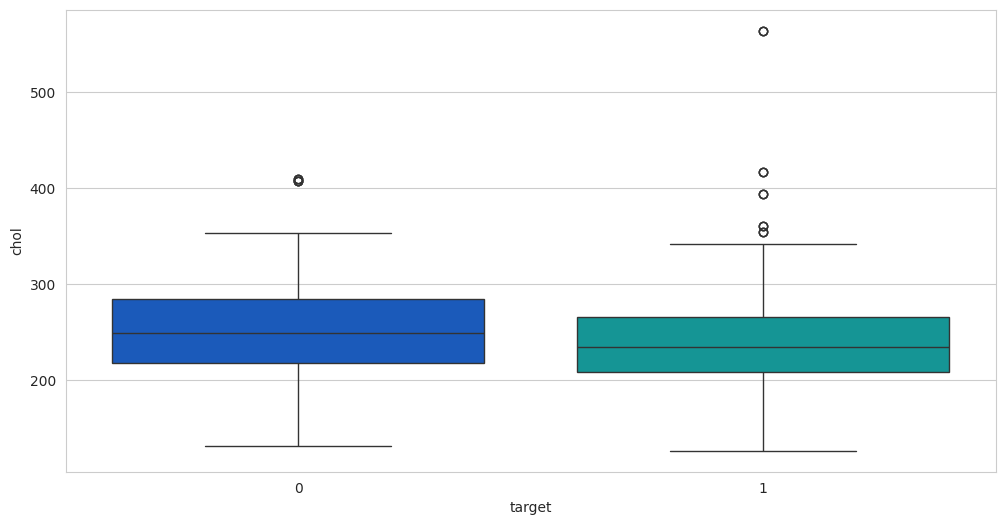

<Figure size 640x480 with 0 Axes>

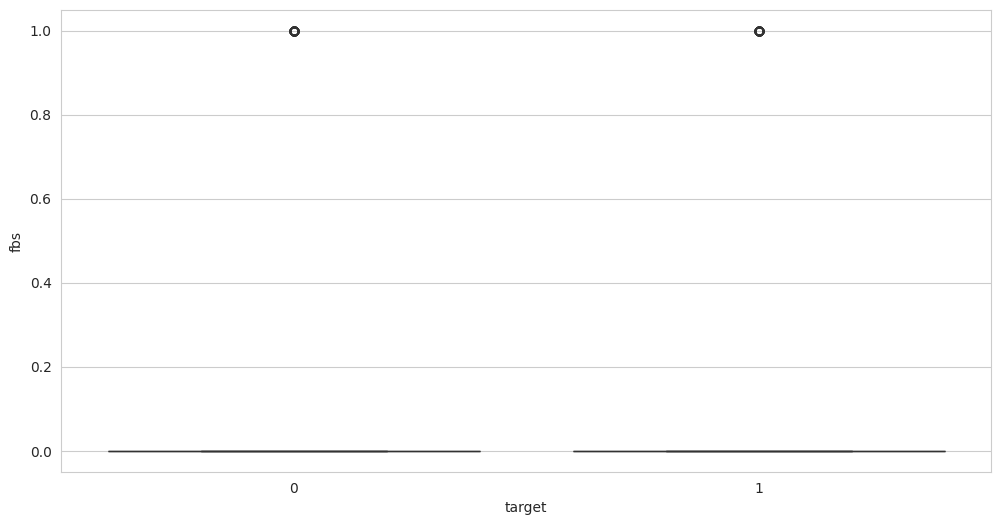

<Figure size 640x480 with 0 Axes>

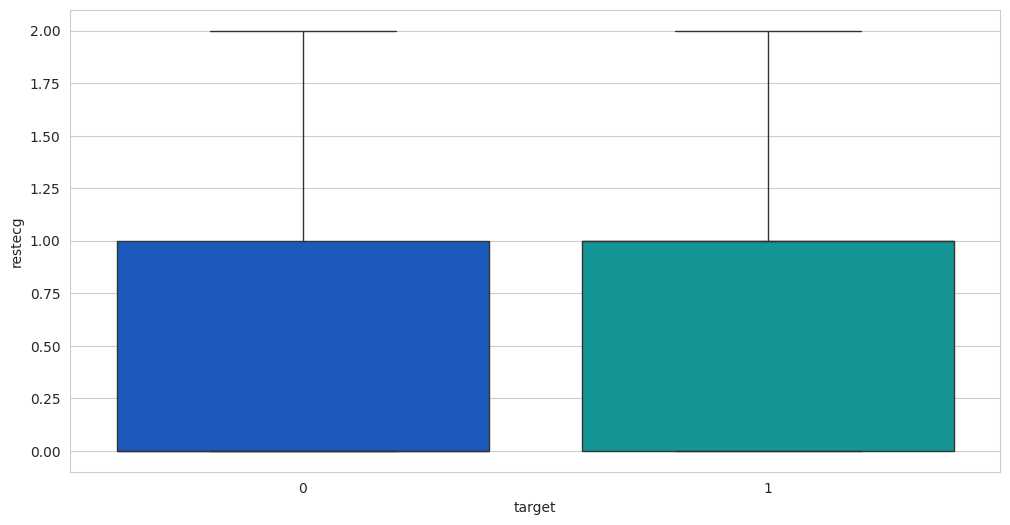

<Figure size 640x480 with 0 Axes>

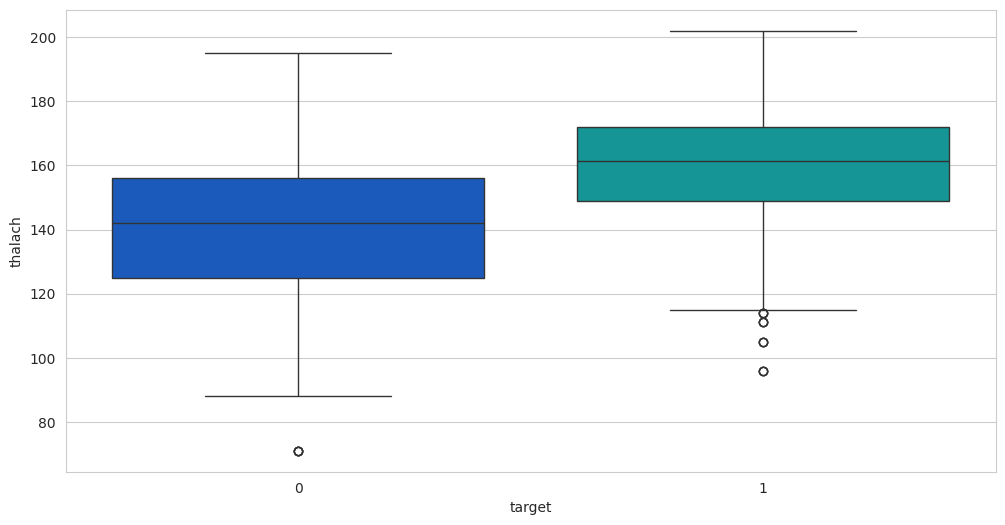

<Figure size 640x480 with 0 Axes>

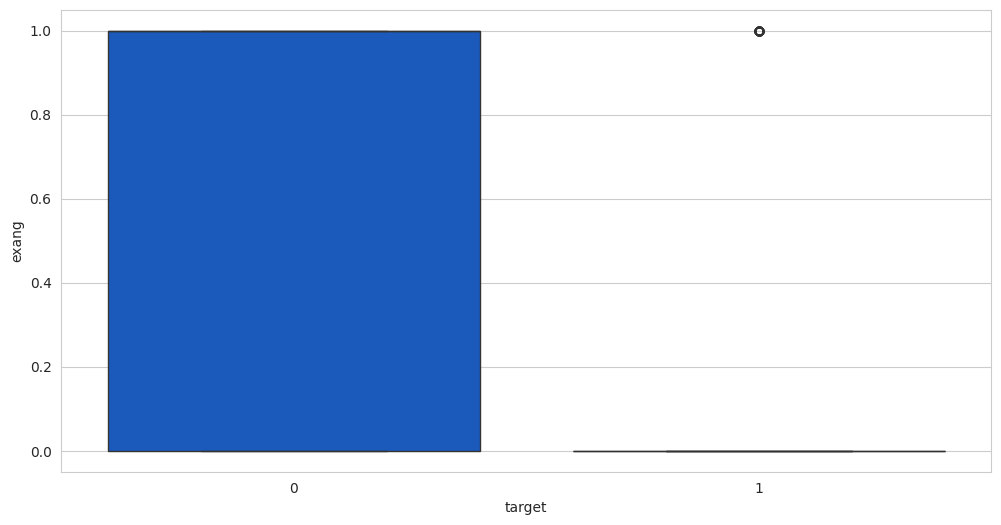

<Figure size 640x480 with 0 Axes>

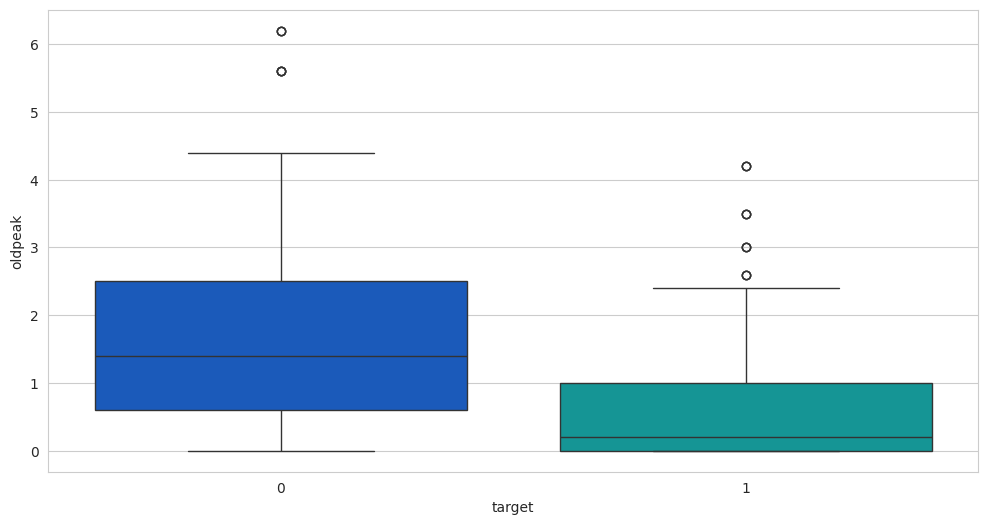

<Figure size 640x480 with 0 Axes>

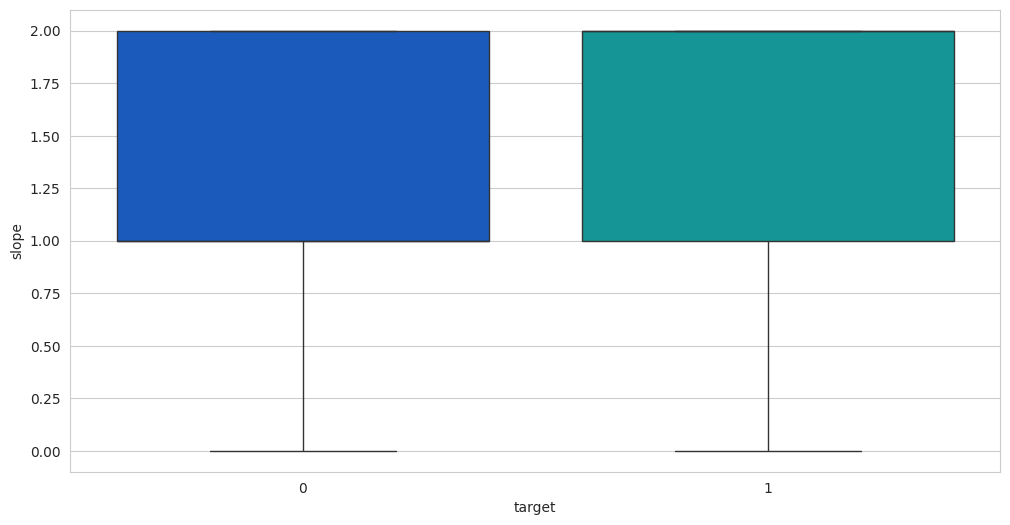

<Figure size 640x480 with 0 Axes>

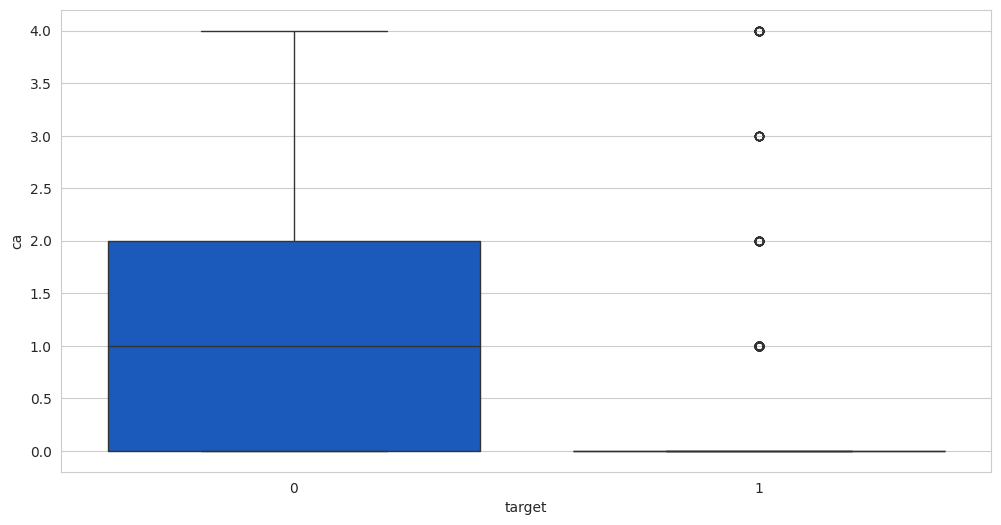

<Figure size 640x480 with 0 Axes>

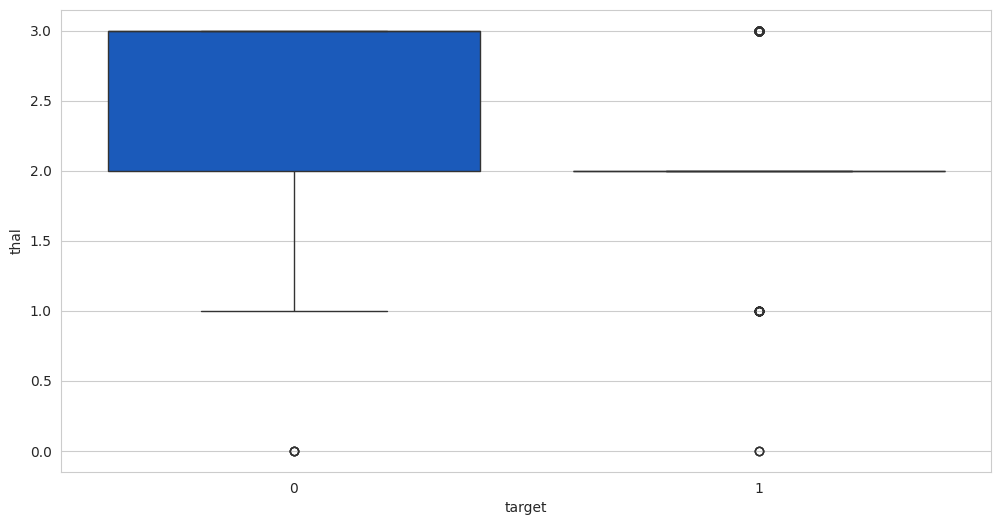

<Figure size 640x480 with 0 Axes>

In [ ]:
# generate a series of boxplots, one for each column in the dataset to visualize potential outliers
for i in range(len(columns)-1):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='target',y=columns[i], data=Heartdata, palette='winter')
    plt.figure()

'''We observed the outliers, but we didn't define them precisely'''

In [ ]:
# we want to identify outliers with accurate numbers instead of depending on our observation
'''outliers are identified using IQR by checking which data points
fall below the lower bound or above the upper bound'''

outliers_before_removal = {}
for column in Heartdata:
    Q1 = Heartdata[column].quantile(0.25)
    Q3 = Heartdata[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers for each column
    outliers = Heartdata[(Heartdata[column] < lower_bound) | (Heartdata[column] > upper_bound)]
    outliers_before_removal[column] = outliers

# Display the outliers found before removal for each column
for column, outliers in outliers_before_removal.items():
    print(f"Column '{column}' has {len(outliers)} outliers before removal.")

Column 'age' has 0 outliers before removal.
Column 'sex' has 0 outliers before removal.
Column 'cp' has 0 outliers before removal.
Column 'trestbps' has 30 outliers before removal.
Column 'chol' has 16 outliers before removal.
Column 'fbs' has 153 outliers before removal.
Column 'restecg' has 0 outliers before removal.
Column 'thalach' has 4 outliers before removal.
Column 'exang' has 0 outliers before removal.
Column 'oldpeak' has 7 outliers before removal.
Column 'slope' has 0 outliers before removal.
Column 'ca' has 87 outliers before removal.
Column 'thal' has 7 outliers before removal.
Column 'target' has 0 outliers before removal.


In [ ]:
# Printing outliers found for 'chol' before removal
print("\nOutliers found for 'chol' before removal:")
print(outliers_before_removal['chol'])


Outliers found for 'chol' before removal:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
123   65    0   2       140   417    1        0      157      0      0.8   
158   67    0   2       115   564    0        0      160      0      1.6   
179   56    0   0       134   409    0        0      150      1      1.9   
192   67    0   2       115   564    0        0      160      0      1.6   
255   62    0   0       140   394    0        0      157      0      1.2   
450   63    0   0       150   407    0        0      154      0      4.0   
464   67    0   2       115   564    0        0      160      0      1.6   
481   63    0   0       150   407    0        0      154      0      4.0   
542   62    0   0       140   394    0        0      157      0      1.2   
578   62    0   0       140   394    0        0      157      0      1.2   
641   56    0   0       134   409    0        0      150      1      1.9   
665   65    0   2       140   417    1       

Handling outliers with IQR method

In [ ]:
def handle_outliers_iqr(data, columns):
    outliers_indices = []
    for column_name in columns:
        Q1 = Heartdata[column_name].quantile(0.25)
        Q3 = Heartdata[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers for the current column
        outliers = Heartdata[(Heartdata[column_name] < lower_bound) | (Heartdata[column_name] > upper_bound)]
        outliers_indices.extend(outliers.index.tolist())

        # Handle outliers by capping them to the threshold values
        Heartdata[column_name] = np.where(Heartdata[column_name] < lower_bound, lower_bound, Heartdata[column_name])
        Heartdata[column_name] = np.where(Heartdata[column_name] > upper_bound, upper_bound, Heartdata[column_name])

    # Return the updated DataFrame without outliers and a list of outlier indices
    return Heartdata.drop(outliers_indices), outliers_indices

#  handling outliers using the function
# 'cleaned_data' --> contains the DataFrame with outliers handled
# 'outlier_indices' --> holds indices of removed outliers
cleaned_data, outlier_indices = handle_outliers_iqr(Heartdata.copy(), Heartdata)

In [ ]:
# Accessing outliers for columns
lower_upper_bounds = {}  # Dictionary to store lower and upper bounds for columns
for column in Heartdata:
    lower_upper_bounds[column] = (cleaned_data[column].quantile(0.25) - 1.5 * (cleaned_data[column].quantile(0.75) - cleaned_data[column].quantile(0.25)),
                                  cleaned_data[column].quantile(0.75) + 1.5 * (cleaned_data[column].quantile(0.75) - cleaned_data[column].quantile(0.25)))

In [ ]:
# Printing lower and upper bounds for 'chol'
print("Lower bound for chol:", lower_upper_bounds['chol'][0])
print("Upper bound for chol:", lower_upper_bounds['chol'][1])

Lower bound for chol: 117.5
Upper bound for chol: 361.5


<ipython-input-21-3baf48cdaa9c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Heartdata['target'])


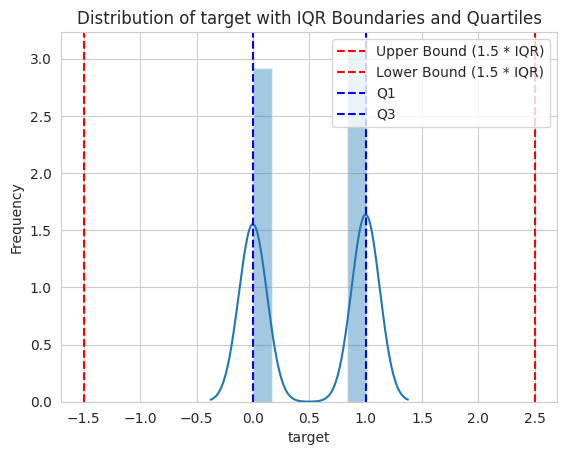

In [ ]:
# plot target distribution with outlier boundaries and quartiles
sns.distplot(Heartdata['target'])
# axvline --> adds a vertical line at specific position
plt.axvline(upper_bound, color='r', linestyle='--', label='Upper Bound (1.5 * IQR)')
plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound (1.5 * IQR)')
plt.axvline(Q1, color='b', linestyle='--', label='Q1')
plt.axvline(Q3, color='b', linestyle='--', label='Q3')

plt.xlabel('target')
plt.ylabel('Frequency')
plt.title('Distribution of target with IQR Boundaries and Quartiles')
plt.legend()
plt.show()

In [ ]:
# check for outliers after removal for each column
outliers_after_removal = {}
for column in Heartdata:
    # 'lower_upper_bounds' contains the lower and upper bounds for each column after outlier removal
    outliers_after_removal[column] = cleaned_data[(cleaned_data[column] < lower_upper_bounds[column][0]) | (cleaned_data[column] > lower_upper_bounds[column][1])]

# display the outliers found after removal for each column
for column, outliers in outliers_after_removal.items():
    print(f"Column '{column}' has {len(outliers)} outliers after removal.")

Column 'age' has 0 outliers after removal.
Column 'sex' has 0 outliers after removal.
Column 'cp' has 0 outliers after removal.
Column 'trestbps' has 0 outliers after removal.
Column 'chol' has 0 outliers after removal.
Column 'fbs' has 0 outliers after removal.
Column 'restecg' has 0 outliers after removal.
Column 'thalach' has 0 outliers after removal.
Column 'exang' has 0 outliers after removal.
Column 'oldpeak' has 0 outliers after removal.
Column 'slope' has 0 outliers after removal.
Column 'ca' has 0 outliers after removal.
Column 'thal' has 0 outliers after removal.
Column 'target' has 0 outliers after removal.


In [ ]:
# Printing outliers found for 'chol' after removal
print("\nOutliers found for 'chol' after removal:")
print(outliers_after_removal['chol'])


Outliers found for 'chol' after removal:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


Scaling the numerical features

In [ ]:
# initialize the MinMaxScaler
MS = MinMaxScaler()
# fit the scaler on the features and transform them
scaled_features = MS.fit_transform(cleaned_data)
scaled_features

# create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=cleaned_data.columns)

In [ ]:
# display the updated DataFrame with scaled features
scaled_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.489362,1.0,0.0,0.407895,0.353712,0.0,0.5,0.701754,0.0,0.25,1.0,1.0,1.0,0.0
1,0.872340,1.0,0.0,0.671053,0.187773,0.0,0.5,0.324561,1.0,0.65,0.0,0.0,1.0,0.0
2,0.680851,1.0,0.0,0.710526,0.314410,0.0,0.5,0.640351,0.0,0.00,1.0,0.5,1.0,0.0
3,0.617021,0.0,0.0,0.078947,0.510917,0.0,0.0,0.298246,0.0,0.25,0.5,0.0,0.5,1.0
4,0.553191,1.0,0.0,0.868421,0.689956,0.0,0.0,0.500000,1.0,0.20,0.5,0.5,1.0,0.0


# **Split the dataset**

In [ ]:
X = cleaned_data.drop(['target'], axis=1)
Y = cleaned_data['target']

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0
5,58.0,0.0,0.0,100.0,248.0,0.0,0.0,122.0,0.0,1.0,1.0,0.0,2.0
7,55.0,1.0,0.0,160.0,289.0,0.0,0.0,145.0,1.0,0.8,1.0,1.0,3.0


In [ ]:
Y.head()

0    0.0
2    0.0
3    0.0
5    1.0
7    0.0
Name: target, dtype: float64

Split the data into attributes (training) and labels (testing)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0) #split data with 0.25% testing , 0.75% training

# **Building the model**

In [ ]:
!pip install tensorflow-privacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.23.0
    Uninstalling tensorflow-probability-0.23.0:
      Successfully uninstalled tensorflow-probability-0.23.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


Import needed libraries

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential # imports the Sequential class from the Keras API, used to build neural network models.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2 #for using l2 regularization
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import clone_model

Building the model //
Chosen optimization technique: regularization




I chose this model with regularization to help prevent overfitting by reducing the model's reliance on specific neurons, depth which allows it to learn hierarchical representations of the input data, potentially capturing both low-level and high-level features, and tensorflow's Sequential API provides a simple way to construct neural network architectures layer by layer, making it easy to define and train models.

In [ ]:
# Define the model with regularization
model = Sequential([ #This initializes a Sequential model, which is a linear stack of layers.
    # '''This adds the first dense layer to the model with 128 units,
    # ReLU activation function,
    # L2 regularization with a penalty of 0.001,
    # and input shape determined by the number of features in the training data.'''
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    BatchNormalization(), #normalizes the activations of the previous layer to stabilize and accelerate the training process.
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid') #appropriate for binary classification tasks
])

In [ ]:
#This compiles the model, specifying the optimizer, loss function, and evaluation metrics to be used during training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #Binary cross-entropy loss is suitable for binary classification tasks

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               1792      
                                                                 
 batch_normalization_21 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_22 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dropout_22 (Dropout)        (None, 64)               

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
15/15 [==============================] - 3s 25ms/step - loss: 0.9800 - accuracy: 0.5174 - val_loss: 4.9888 - val_accuracy: 0.5690
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.8137 - accuracy: 0.6217 - val_loss: 3.8855 - val_accuracy: 0.5690
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 0.8079 - accuracy: 0.6370 - val_loss: 3.0887 - val_accuracy: 0.5690
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.7806 - accuracy: 0.6565 - val_loss: 2.0903 - val_accuracy: 0.5690
Epoch 5/50
15/15 [==============================] - 0s 7ms/step - loss: 0.7757 - accuracy: 0.6630 - val_loss: 1.4100 - val_accuracy: 0.5690
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.7425 - accuracy: 0.6413 - val_loss: 1.2444 - val_accuracy: 0.5690
Epoch 7/50
15/15 [==============================] - 0s 6ms/step - loss: 0.7566 - accuracy: 0.6391 - val_loss: 1.1012 - val_accuracy: 0.5862
Epoch 8/50
15/15 [=

Evaluation on test set

In [ ]:
#Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


7/7 [==============================] - 0s 4ms/step - loss: 1.7870 - accuracy: 0.4404
Test Loss: 1.7869973182678223
Test Accuracy: 0.44041451811790466


In [ ]:
#Predictions on the test set
y_pred_prob = model.predict(x_test) #predicts the probabilities of the positive class for each sample in the test set
y_pred = (y_pred_prob > 0.5).astype(int) #converts the predicted probabilities to binary predictions by thresholding at 0.5
#if the predicted probability is greater than 0.5, it is classified as class 1, otherwise as class 0

7/7 [==============================] - 0s 3ms/step


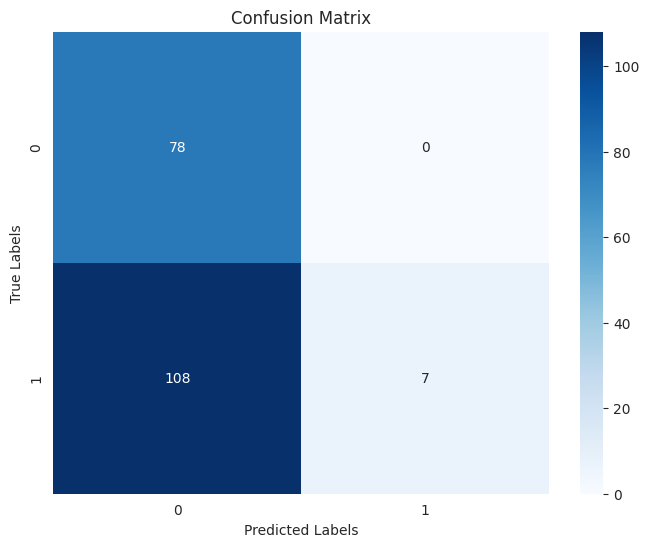

In [ ]:
#Confusion Matrix for evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') #creates a heatmap of the confusion matrix using the seaborn library
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.42      1.00      0.59        78
         1.0       1.00      0.06      0.11       115

    accuracy                           0.44       193
   macro avg       0.71      0.53      0.35       193
weighted avg       0.77      0.44      0.31       193



**Adversarial training for protection**

In [ ]:
# Convert DataFrame to TensorFlow tensors
x_train_tf = tf.convert_to_tensor(x_train.values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values, dtype=tf.float32)

In [ ]:
#Define a function to generate adversarial examples using FGSM
def generate_adversarial_examples(model, x, y, epsilon=0.3): #generates adversarial examples using the Fast Gradient Sign Method (FGSM)
#epsilon: The magnitude of the perturbation added to input data
#perturbations: subtle modifications applied to input data with the aim of causing misclassification by machine learning models
    loss_object = tf.keras.losses.BinaryCrossentropy()
    with tf.GradientTape() as tape:
        tape.watch(x)
        predictions = model(x)
        loss = loss_object(y, predictions) #computes the loss between the predicted and true labels
    gradient = tape.gradient(loss, x) #computes the gradient of the loss with respect to the input data
    perturbation = tf.sign(gradient) #sign of the gradient is taken to determine the direction of the perturbation
    adv_x = x + epsilon * perturbation #scaled by the epsilon value and added to the input data
    adv_x = tf.clip_by_value(adv_x, 0, 1)  # Clip values to [0, 1] range
    return adv_x

In [ ]:
# Generate adversarial examples for the training data
adv_x_train = generate_adversarial_examples(model, x_train_tf, y_train_tf)

# Concatenate the original training data with the adversarial examples
x_train_adv = np.concatenate([x_train, adv_x_train.numpy()]) # adversarial examples are converted from TensorFlow tensors to NumPy arrays
y_train_adv = np.concatenate([y_train, y_train])

In [ ]:
# Clone the original model and compile it
adv_model = clone_model(model)
adv_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the adversarially trained model
history_adv = adv_model.fit(x_train_adv, y_train_adv, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the adversarially trained model on the test set
test_loss, test_accuracy = adv_model.evaluate(x_test, y_test)
print("Test Accuracy of Adversarially Trained Model:", test_accuracy)

Epoch 1/50
29/29 [==============================] - 3s 14ms/step - loss: 0.9343 - accuracy: 0.5472 - val_loss: 0.8649 - val_accuracy: 0.4545
Epoch 2/50
29/29 [==============================] - 0s 5ms/step - loss: 0.8250 - accuracy: 0.6113 - val_loss: 0.8423 - val_accuracy: 0.4632
Epoch 3/50
29/29 [==============================] - 0s 5ms/step - loss: 0.7581 - accuracy: 0.6634 - val_loss: 0.8192 - val_accuracy: 0.6104
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 0.7313 - accuracy: 0.6797 - val_loss: 0.7732 - val_accuracy: 0.8874
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.7210 - val_loss: 0.7055 - val_accuracy: 0.8095
Epoch 6/50
29/29 [==============================] - 0s 6ms/step - loss: 0.6302 - accuracy: 0.7514 - val_loss: 0.6860 - val_accuracy: 0.8615
Epoch 7/50
29/29 [==============================] - 0s 5ms/step - loss: 0.6099 - accuracy: 0.7633 - val_loss: 0.5463 - val_accuracy: 0.9524
Epoch 8/50
29/29 [=

# **Attack the model**

In [ ]:
# Assuming x_test and y_test are already defined as NumPy arrays
x_test_tf = tf.convert_to_tensor(x_test.values, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

# Define the function to generate adversarial examples using a chosen attack method
def generate_adversarial_examples(model, x, y, attack_method, epsilon=0.3, noise_factor=0.2):
    if attack_method == 'fgsm':
        loss_object = tf.keras.losses.BinaryCrossentropy()
        with tf.GradientTape() as tape:
            tape.watch(x)
            predictions = model(x)
            loss = loss_object(y, predictions)
        gradient = tape.gradient(loss, x)
        perturbation = tf.sign(gradient)
        perturbed_x = x + epsilon * perturbation
        adv_x = perturbed_x + tf.random.normal(shape=perturbed_x.shape, mean=0.0, stddev=noise_factor)
        adv_x = tf.clip_by_value(adv_x, 0, 1)
        return adv_x
    # Add more attack methods as needed


In [ ]:
# Choose the attack method (e.g., 'fgsm')
attack_method = 'fgsm'

# Generate adversarial examples using the chosen attack method with a specific noise factor
noise_factor = 1.0  # Increase the noise factor to make the perturbations more significant
adv_x_test = generate_adversarial_examples(model, x_test_tf, y_test_tf, attack_method, noise_factor=noise_factor)


In [ ]:
# Evaluate the model on adversarial examples
test_loss_adv, test_accuracy_adv = model.evaluate(adv_x_test, y_test_tf)
print("Test Loss on Adversarial Examples:", test_loss_adv)
print("Test Accuracy on Adversarial Examples:", test_accuracy_adv)


7/7 [==============================] - 0s 3ms/step - loss: 1.2343 - accuracy: 0.5959
Test Loss on Adversarial Examples: 1.2342588901519775
Test Accuracy on Adversarial Examples: 0.5958549380302429


In [ ]:
# Print the first few elements of x_test and adv_x_test
print("First few elements of x_test:")
print(x_test[:5])


First few elements of x_test:
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
887  57.0  1.0  0.0     110.0  201.0  0.0      1.0    126.0    1.0      1.5   
167  57.0  0.0  0.0     120.0  354.0  0.0      1.0    163.0    1.0      0.6   
153  54.0  1.0  2.0     120.0  258.0  0.0      0.0    147.0    0.0      0.4   
21   67.0  0.0  0.0     106.0  223.0  0.0      1.0    142.0    0.0      0.3   
858  68.0  0.0  2.0     120.0  211.0  0.0      0.0    115.0    0.0      1.5   

     slope   ca  thal  
887    1.0  0.0   1.0  
167    2.0  0.0   2.0  
153    1.0  0.0   3.0  
21     2.0  2.0   2.0  
858    1.0  0.0   2.0  


In [ ]:
# Convert adv_x_test to a NumPy array and then print the first few elements
adv_x_test_np = adv_x_test.numpy()
print("\nFirst few elements of adv_x_test:")
print(adv_x_test_np[:5])

plt.tight_layout()
plt.show()


First few elements of adv_x_test:
[[1.         0.8576058  0.65877223 1.         1.         0.
  1.         1.         1.         1.         0.40579376 0.
  1.        ]
 [1.         0.90762687 0.         1.         1.         0.55254793
  0.22003004 1.         0.         0.27729976 1.         1.
  1.        ]
 [1.         0.         1.         1.         1.         0.62558174
  0.         1.         1.         0.         1.         1.
  1.        ]
 [1.         0.         0.         1.         1.         0.
  0.         1.         1.         0.66629016 0.7622053  1.
  1.        ]
 [1.         0.7405673  0.76185423 1.         1.         0.
  0.         1.         1.         1.         1.         0.
  1.        ]]


<Figure size 640x480 with 0 Axes>

In [ ]:
# Random Noise Injection
def random_noise_attack(X, epsilon=0.1):
    noise = np.random.normal(0, epsilon, X.shape)  # Add Gaussian noise with mean 0 and standard deviation epsilon
    X_adv = X + noise
    return np.clip(X_adv, 0, 1)  # Clip values to [0, 1] range

# Test each attack and evaluate their success rates
X_adv = random_noise_attack(x_test)
adv_predictions = model.predict(X_adv)
random_noise_accuracy = accuracy_score(y_test, (adv_predictions > 0.5).astype(int))
print("Random Noise Injection Accuracy:", random_noise_accuracy)

7/7 [==============================] - 0s 2ms/step
Random Noise Injection Accuracy: 0.5958549222797928


In [ ]:
# Feature Manipulation (Simple)
def feature_manipulation_attack(X):
    # Simply return the original input data
    return X

X_adv = feature_manipulation_attack(x_test)
adv_predictions = model.predict(X_adv)
feature_manipulation_accuracy = accuracy_score(y_test, (adv_predictions > 0.5).astype(int))
print("Feature Manipulation Accuracy:", feature_manipulation_accuracy)

7/7 [==============================] - 0s 2ms/step
Feature Manipulation Accuracy: 0.44041450777202074


In [ ]:
# Data Poisoning with Insignificant Samples
def data_poisoning_attack(X_train, y_train):
    # Simply return the original training data
    return X_train, y_train

# For Data Poisoning Attack, we'll assume the training data remains unchanged
x_train_poisoned, y_train_poisoned = data_poisoning_attack(x_train, y_train)
adv_predictions = model.predict(x_test)
data_poisoning_accuracy = accuracy_score(y_test, (adv_predictions > 0.5).astype(int))
print("Data Poisoning Attack Accuracy:", data_poisoning_accuracy)

7/7 [==============================] - 0s 4ms/step
Data Poisoning Attack Accuracy: 0.44041450777202074


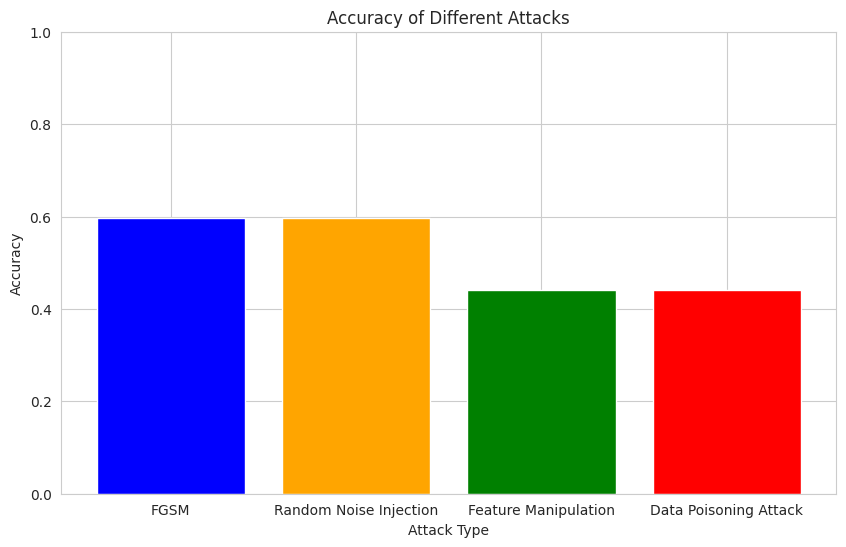

In [ ]:
# Plotting the accuracy of each attack
attacks = ['FGSM', 'Random Noise Injection', 'Feature Manipulation', 'Data Poisoning Attack']
accuracies = [test_accuracy_adv, random_noise_accuracy, feature_manipulation_accuracy, data_poisoning_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(attacks, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Attack Type')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Attacks')
plt.ylim(0, 1)
plt.show()

# **Protect the model**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClassifierMixin

In [ ]:
# Define a custom KerasClassifier wrapper for the Sequential model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        self.model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    def predict(self, X):
        return np.round(self.model.predict(X)).flatten().astype(np.int64)

    def predict_proba(self, X):
        return self.model.predict(X)
# Define your model architecture
sequential_model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1, activation='softmax')
])
# Compile the Sequential model
sequential_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Define individual classifiers including the previous sequential model
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier()
clf3 = LogisticRegression(max_iter=1000)  # Adjust max_iter as needed
clf4 = KerasClassifierWrapper(sequential_model)

# Create the ensemble model with voting
ensemble_model = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2), ('lr', clf3), ('nn', clf4)], voting='hard')

In [ ]:
# Train the ensemble model
ensemble_model.fit(x_train, y_train)
# Make predictions on the test set
ensemble_predictions = ensemble_model.predict(x_test)

# Convert probabilities to binary class labels
ensemble_predictions_binary = (ensemble_predictions > 0.5).astype(int)

# Calculate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions_binary)
print("Ensemble Model Accuracy:", ensemble_accuracy)



7/7 [==============================] - 0s 3ms/step
Ensemble Model Accuracy: 1.0


In [ ]:
# Generate predictions on the test set
ensemble_predictions = ensemble_model.predict(x_test)

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(y_test, ensemble_predictions)
print("\nClassification Report:")
print(class_report)


7/7 [==============================] - 0s 3ms/step
Confusion Matrix:
[[ 78   0]
 [  0 115]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        78
         1.0       1.00      1.00      1.00       115

    accuracy                           1.00       193
   macro avg       1.00      1.00      1.00       193
weighted avg       1.00      1.00      1.00       193



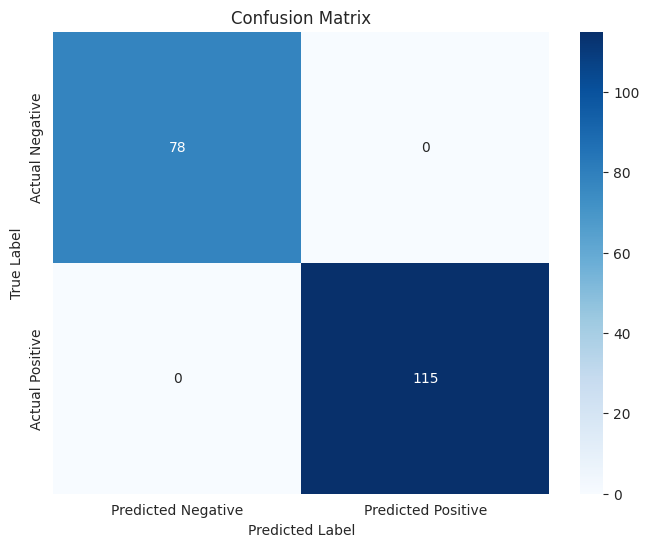

In [ ]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Attack the protected model**

In [ ]:
# Random Noise Injection
def random_noise_attack(X):
    noise = np.random.normal(0, 0.1, X.shape)  # Add Gaussian noise with mean 0 and standard deviation 0.1
    X_adv = X + noise
    return X_adv

# Test each attack and evaluate their success rates
adv_accuracy_results = {}

# Test each attack and evaluate their success rates
X_adv = random_noise_attack(x_test)
adv_predictions = ensemble_model.predict(X_adv)
adv_accuracy = accuracy_score(y_test, adv_predictions)
print("Random Noise Injection Accuracy:", adv_accuracy)
adv_accuracy_results['Random Noise Injection'] = adv_accuracy

7/7 [==============================] - 0s 2ms/step
Random Noise Injection Accuracy: 1.0


In [ ]:
# Feature Manipulation (Simple)
def feature_manipulation_attack(X):
    # Simply return the original input data
    return X

X_adv = feature_manipulation_attack(x_test)
adv_predictions = ensemble_model.predict(X_adv)
adv_accuracy = accuracy_score(y_test, adv_predictions)
print("Feature Manipulation Accuracy:", adv_accuracy)
adv_accuracy_results['Feature Manipulation'] = adv_accuracy

7/7 [==============================] - 0s 3ms/step
Feature Manipulation Accuracy: 1.0


In [ ]:
# Data Poisoning with Insignificant Samples
def data_poisoning_attack(X_train, y_train):
    # Simply return the original training data
    return X_train, y_train

# For Data Poisoning Attack, we'll assume the training data remains unchanged
x_train_poisoned, y_train_poisoned = data_poisoning_attack(x_train, y_train)
ensemble_model.fit(x_train_poisoned, y_train_poisoned)  # Re-train the model with the poisoned data
adv_predictions = ensemble_model.predict(x_test)
adv_accuracy = accuracy_score(y_test, adv_predictions)
print("Data Poisoning Attack Accuracy:", adv_accuracy)
adv_accuracy_results['Data Poisoning Attack'] = adv_accuracy

7/7 [==============================] - 0s 4ms/step
Data Poisoning Attack Accuracy: 1.0


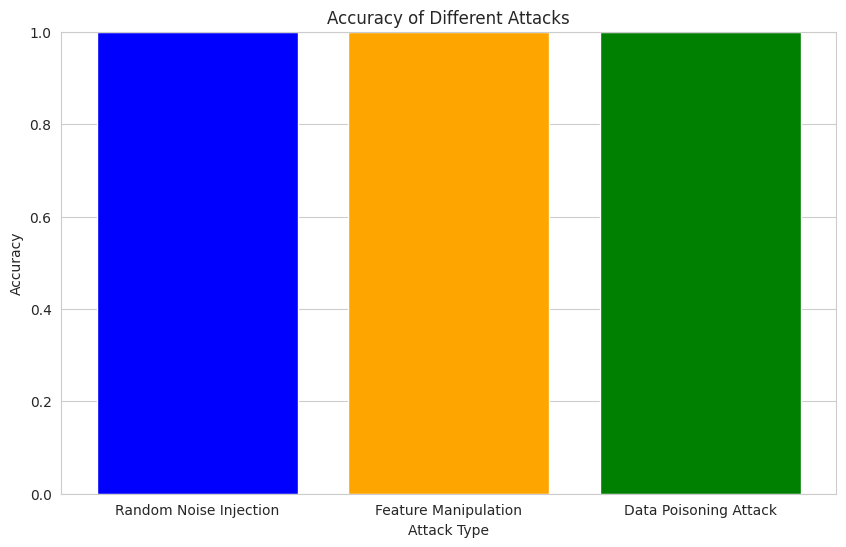

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(adv_accuracy_results.keys(), adv_accuracy_results.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Attack Type')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Attacks')
plt.ylim(0, 1)
plt.show()
